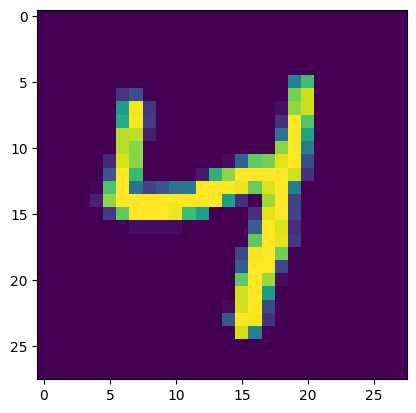

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

from test_data import test_data

test_digit = torch.tensor(test_data)

plt.imshow(test_digit.reshape(28,28))

In [2]:

model = torch.load("trained_model.pt", weights_only=False)
model.eval()

with torch.no_grad():
    prediction = model(test_digit.view(1,1,28,28))

print(prediction.argmax())

tensor(4)


In [3]:
# NPU

import openvino as ov
from cnn_structure import DigitRecognitionModel

core = ov.Core()
core.available_devices





compiled_model = core.compile_model("trained_model.onnx", "NPU")

with torch.no_grad():
    prediction = compiled_model(test_digit.view(1,1,28,28))

print(prediction[0][0].argmax())

4


In [12]:
# NPU



import openvino as ov
from cnn_structure import DigitRecognitionModel

from torchvision import transforms
from PIL import Image

# show whole tensors
torch.set_printoptions(threshold=10_000)

core = ov.Core()
core.available_devices
compiled_model = core.compile_model("trained_model.onnx", "NPU")


# Load the grayscale image
image = Image.open("one.png").convert('L')  # Convert to grayscale

# Define the transform to resize the image and convert to tensor
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize to 28x28
    transforms.ToTensor(),         # Convert to tensor and scale to [0, 1]
])

# Apply the transform
img_tensor = transform(image).view(1,1,28,28)
# img_tensor
# plt.imshow(img_tensor.reshape(28,28))


with torch.no_grad():
    new_prediction = compiled_model(img_tensor.view(1,1,28,28))

print(new_prediction[0][0].argmax())


5
